<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_preclass_ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics for Machine Learning Pre-class assignment 4 (optional) Darts throwing problem
## [Problem 1] Choosing a dart mat

In [14]:
import numpy as np

np.random.seed(0)

dices = np.arange(1, 7)  # Number of dices are 6 counted from 0
dart = np.random.choice(dices)
print(f"Dart chosen is dart {dart}")
print(dices)

Dart chosen is dart 5
[1 2 3 4 5 6]


## [Problem 2] Throw darts and record the place

In [11]:
# Choose x, y coordinates from multivariate normal distribution
mean = [0, 0]               # Sample shows that mean is 0
cov = [[.01, 0], [0, .01]]  # Variance is 0.1^2
x, y = np.random.multivariate_normal(mean, cov, 1)[0]
print(f"Location of dart: ({x}, {y})")

Location of dart: (0.11227949188291289, 0.03028052195530815)


## [Problem 3] Throw a lot of darts and record them in a state of being tied to the number

Initialize dart mats tracking dictionary with a list of dart location (using tuple (x,y) for 2 coordinates)

In [23]:
n_darts = 1000
darts_track = {}

for i in range(n_darts):
    dart_mat = np.random.choice(dices)
    x = np.random.normal(loc=dart_mat, scale=0.1)   # loc for drawing
    y = np.random.normal(loc=0, scale=0.1)
    
    if dart_mat in darts_track:
        darts_track[dart_mat] = np.concatenate((darts_track[dart_mat], [[x, y]]))
    else:
        darts_track[dart_mat] = np.array([[x, y]])

print(darts_track)

{2: array([[ 2.10657006e+00,  1.55505452e-01],
       [ 1.93198792e+00,  5.25681974e-03],
       [ 1.97260778e+00, -3.93512649e-02],
       [ 1.82457373e+00,  1.84789791e-01],
       [ 2.00174594e+00,  1.52419169e-02],
       [ 2.02313625e+00, -8.00609600e-03],
       [ 1.84702109e+00,  1.29713435e-02],
       [ 2.02090640e+00,  3.19531976e-02],
       [ 2.11354619e+00,  1.08967824e-02],
       [ 2.15786885e+00, -9.78768443e-02],
       [ 1.98010428e+00,  8.16668740e-02],
       [ 1.99526163e+00,  6.44333846e-02],
       [ 2.07585868e+00,  5.50417624e-02],
       [ 2.06224587e+00, -7.33946211e-02],
       [ 2.02282380e+00,  6.70993451e-02],
       [ 2.11272053e+00, -9.10302743e-02],
       [ 2.01511909e+00,  7.00718848e-02],
       [ 1.94694289e+00,  9.72601492e-02],
       [ 1.97243305e+00,  2.37506998e-01],
       [ 2.06122853e+00, -3.14410918e-01],
       [ 2.05416962e+00, -2.67245780e-04],
       [ 1.98500278e+00, -1.51221360e-01],
       [ 2.03309473e+00,  6.21915516e-02],
       

## [Problem 4] Drawing the position of the darts

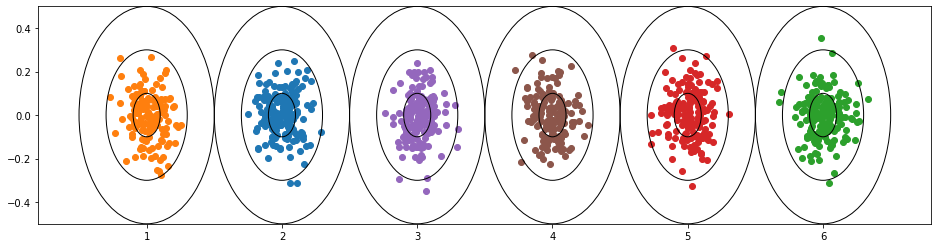

In [72]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 4))
for dart, locs in darts_track.items():
    plt.scatter(locs[:,0], locs[:,1])
    cir_1 = mpatches.Circle(xy=(dart, 0), radius=0.1, fill=False)
    cir_2 = mpatches.Circle(xy=(dart, 0), radius=0.3, fill=False)
    cir_3 = mpatches.Circle(xy=(dart, 0), radius=0.5, fill=False)
    ax.add_patch(cir_1)
    ax.add_patch(cir_2)
    ax.add_patch(cir_3)

ax.set_xlim(0, 7)
ax.set_ylim(-0.5, 0.5)
plt.show()

## [Problem 5] Functionalization

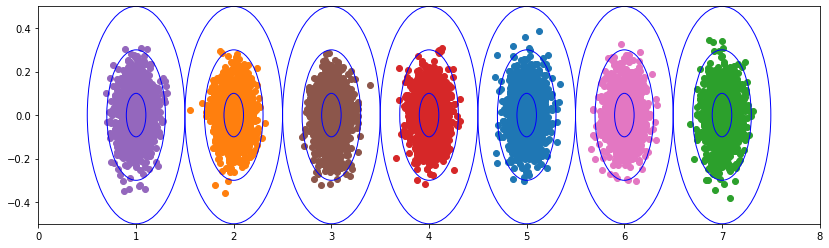

In [80]:
def darts(n_darts, n_mats):
    darts_track = {}

    for _ in range(n_darts):
        loc = np.random.randint(1, n_mats + 1)
        x = np.random.normal(loc=loc, scale=0.1)
        y = np.random.normal(loc=0, scale=0.1)

        if loc in darts_track:
            darts_track[loc] = np.concatenate((darts_track[loc], [[x, y]]))
        else:
            darts_track[loc] = np.array([[x, y]])
    
    fig, ax = plt.subplots(figsize=(14, 4))
    for dart, locs in darts_track.items():
        plt.scatter(locs[:,0], locs[:,1])
        cir_1 = mpatches.Circle(xy=(dart, 0), radius=0.1, ec='b', fill=False)
        cir_2 = mpatches.Circle(xy=(dart, 0), radius=0.3, ec='b', fill=False)
        cir_3 = mpatches.Circle(xy=(dart, 0), radius=0.5, ec='b', fill=False)
        ax.add_patch(cir_1)
        ax.add_patch(cir_2)
        ax.add_patch(cir_3)

    ax.set_xlim(0, n_mats + 1)
    ax.set_ylim(-0.5, 0.5)
    plt.show()

darts(10000, 7)

### I don't know why my circles look like ellipse rather than circle (circles in the tutorial are beautiful), could you give me some advice?